# Integrated Surface Database (ISD)

##### The Integrated Surface Database (ISD) consists of global hourly and synoptic observations compiled from numerous sources into a single common ASCII format and common data model. ISD was developed as a joint activity within Asheville's Federal Climate Complex. NCEI, with U.S. Air Force and Navy partners, began the effort in 1998 with the assistance of external funding from several sources. ISD integrates data from over 100 original data sources, including numerous data formats that were key-entered from paper forms during the 1950s-1970s time frame.

##### The database includes over 35,000 stations worldwide, with some having data as far back as 1901, though the data show a substantial increase in volume in the 1940s and again in the early 1970s. Currently, there are over 14,000 "active" stations updated daily in the database. The total uncompressed data volume is around 600 gigabytes; however, it continues to grow as more data are added. ISD includes numerous parameters such as wind speed and direction, wind gust, temperature, dew point, cloud data, sea level pressure, altimeter setting, station pressure, present weather, visibility, precipitation amounts for various time periods, snow depth, and various other elements as observed by each station.

### First we download the isd-history file that contains a description about the stations, location and last data received:

In [ ]:
!wget "https://www1.ncdc.noaa.gov/pub/data/noaa/isd-history.csv"

### Have a look to this file using your command line skills (`head` command)

### Now we use pandas and cartopy to create a plot representing the position of all the available stations

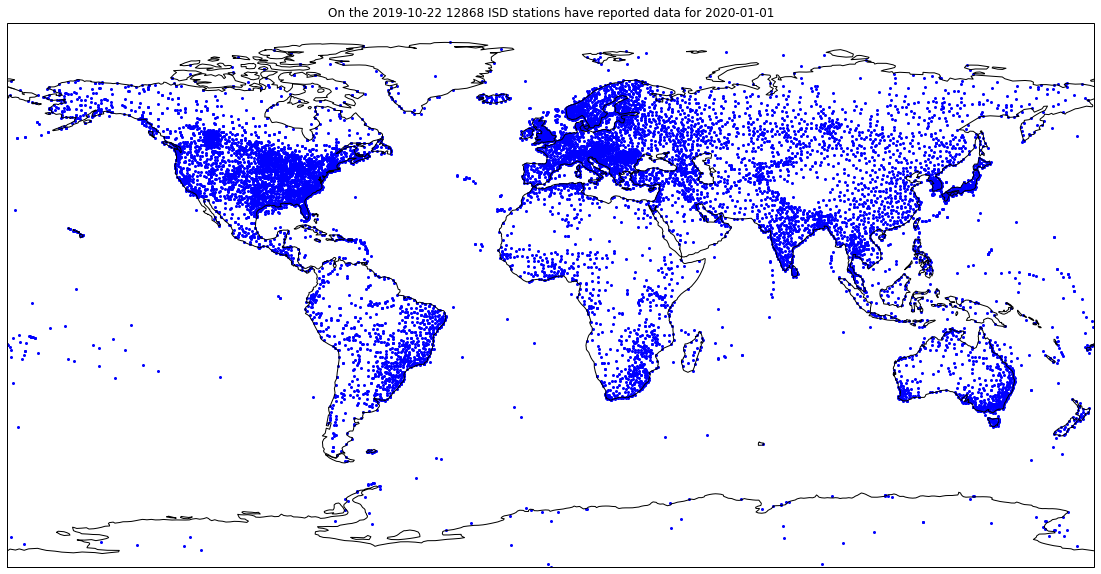

In [2]:
%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

def plot_isd_stations(date_str):
    
    df = pd.read_csv("isd-history.csv", parse_dates=[9,10])
    df.dropna(subset=['LAT', 'LON'], inplace=True)
    
    df = df[(df['END'] >= date_str)]
    
    plt.figure(figsize=(20,10))

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-180, 180, -90, 90])
    ax.coastlines()
    
    lats = df.LAT.values.tolist()
    lons = df.LON.values.tolist()

    plt.scatter(lons, lats,
             color='blue', marker='o', s=4,
             transform=ccrs.Geodetic())

    plt.title('On the 2019-10-22 {} ISD stations have reported data for {}'.format(len(df.index), date_str))
    plt.show()
    

plot_isd_stations('2020-01-01')

### Can you modify the code above to see how stations are updated and how up-to-date is the information they contain by countries

### Also, modify the same code to zoom into the Australian region

### The following file contains the list of the codes for each country:

In [ ]:
!wget "ftp://ftp.ncdc.noaa.gov/pub/data/noaa/country-list.txt"

### Find Australia in that file and filter the previous isd-history to show Australian stations containing that code in the isd-history table. Use pandas dataframe and its filtering functionality.

###  For example for the 083300 station corresponding to Talavera la Real in Spain. We can download the 2018 data doing:

In [ ]:
!wget "ftp://ftp.ncdc.noaa.gov/pub/data/noaa/isd-lite/2018/083300-99999-2018.gz"

             datetime  air temp  dew point   mslp  wind dir  wind speed  \
0 2018-01-01 00:00:00        81         69  10350       260          15   
1 2018-01-01 01:00:00        65         55  10354       140          10   
2 2018-01-01 02:00:00        60         55  10346       150          10   
3 2018-01-01 03:00:00        51         45  10351       220           5   
4 2018-01-01 04:00:00        35         31  10351        50          15   

   sky cov  1h prec  6h prec  
0      NaN      NaN      NaN  
1      NaN      NaN      NaN  
2      NaN      NaN      NaN  
3      NaN      NaN      NaN  
4      NaN      NaN      NaN  


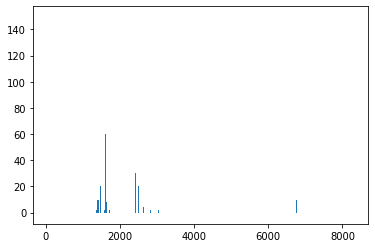

3088.0

In [3]:
import numpy as np
from datetime import timedelta, datetime

def get_prec(station_code, date_from):
    col_names = ["year", "month", "day", "hour", "air temp", "dew point", "mslp", "wind dir", "wind speed", "sky cov", "1h prec", "6h prec"]
    df = pd.read_fwf('{}-2018.gz'.format(station_code), compression='gzip', header=None, names=col_names, parse_dates={'datetime': ['year', 'month', 'day', 'hour']})
    df["sky cov"].replace(to_replace={-9999: np.nan}, inplace=True)
    df["6h prec"].replace(to_replace={-9999: np.nan}, inplace=True)
    df["1h prec"].replace(to_replace={-9999: np.nan}, inplace=True)
    
    print(df.head())

    plt.bar(np.arange(len(df.index)), df["1h prec"].values)
    plt.show()
    return np.nansum(df["1h prec"].values)

get_prec("083300-99999", datetime(2018, 1, 1))

### Exercise: Can you locate one or more ISD stations in Australia and plot a few comparisons for June 2018 and compare to the previously used total precipitation climate data located at `/g/data/oe9/user/data`? You'll have to use XArray and Pandas to create these representations.